# Projet Hackathon : Quelle(s) énergie(s) pour demain ? 

## Imports 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
sns.set()

## Open datas 

In [52]:
dataPath ='/'.join(os.getcwd().split("/")[:-1])+"/data/"

In [117]:
oil_production = pd.read_excel(dataPath+"data_production.xlsx", 1,  header = 2)

In [118]:
oil_production.iloc[26] = oil_production.iloc[26].fillna(0) + oil_production.iloc[28].fillna(0)

In [119]:
oil_production = oil_production.dropna(thresh= len(oil_production.columns)-20).fillna(0)

In [120]:
oil_production_total = pd.DataFrame(oil_production[oil_production["Million tonnes"].str.contains("Total")]).set_index("Million tonnes")
oil_production = oil_production[oil_production["Million tonnes"].str.contains("Total") == False].set_index("Million tonnes")

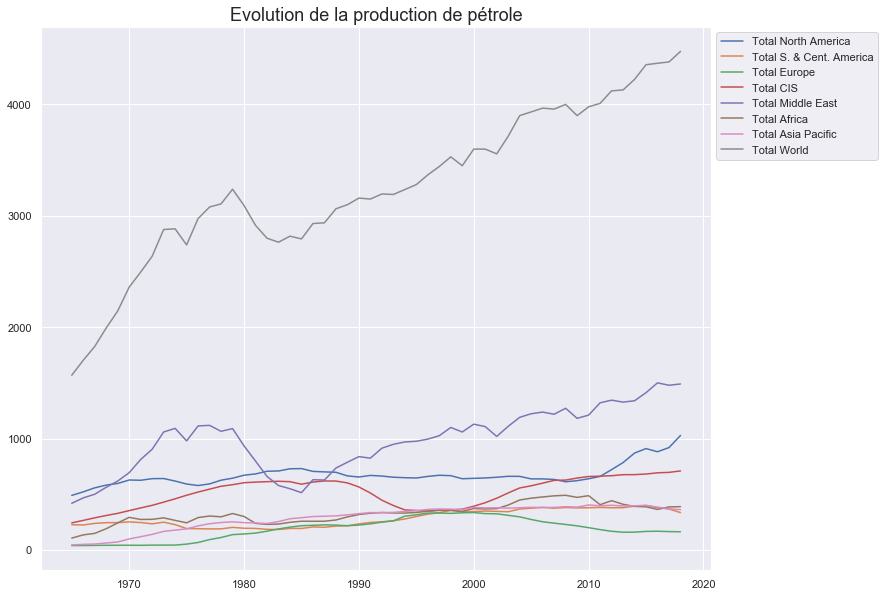

In [144]:
plt.figure(figsize=(12,10))
plt.title("Evolution de la production de pétrole", fontSize=18)
for k,pays in enumerate(oil_production_total.index) :   
    plt.plot(oil_production_total.columns.values[:-5], oil_production_total.iloc[k][:-5], label=f"{pays}")
plt.legend(bbox_to_anchor = (1,1))
plt.show()